# **Problem Statement:**
 You are the data scientist at a telecom company named “Neo” whose customers
 are churning out to its competitors. You have to analyze the data of your
 company and find insights and stop your customers from churning out to other
 telecom companies

# **Project Objective:**

The objective of this project is to analyze customer churn patterns in **Neo Telecom** and develop predictive models to help the company retain its customers. By leveraging **data manipulation, visualization, and machine learning techniques**, this project aims to:  

- Identify key factors influencing customer churn.  
- Extract meaningful insights from customer demographics, payment methods, and contract types.  
- Build predictive models (Linear Regression, Logistic Regression, Decision Tree, and Random Forest) to classify and forecast customer churn.  
- Provide data-driven recommendations to **reduce churn rate** and improve customer retention strategies.  

This analysis will empower **Neo Telecom** to make informed business decisions, optimize customer engagement, and enhance overall service quality.

# **Importing thr Required Library**

In [37]:
 # Basic Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning Library
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *

In [38]:
df =pd.read_csv("/content/drive/MyDrive/dataset/customer_churn.csv") # Loading the required dataset

In [39]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Data Description:**


This dataset contains **7,043 records** of customer information from a telecommunications company. It includes demographic details, subscription details, service usage, and churn status.  

#### **Column Descriptions**  

1. **customerID** *(object)* – Unique identifier assigned to each customer.  
2. **gender** *(object)* – Customer’s gender (Male/Female).  
3. **SeniorCitizen** *(int64)* – Indicates whether the customer is a senior citizen (1 = Yes, 0 = No).  
4. **Partner** *(object)* – Whether the customer has a partner (Yes/No).  
5. **Dependents** *(object)* – Whether the customer has dependents (Yes/No).  
6. **tenure** *(int64)* – Number of months the customer has stayed with the company.  
7. **PhoneService** *(object)* – Whether the customer has a phone service (Yes/No).  
8. **MultipleLines** *(object)* – Whether the customer has multiple phone lines (Yes/No/No phone service).  
9. **InternetService** *(object)* – Type of internet service subscribed (DSL/Fiber optic/No).  
10. **OnlineSecurity** *(object)* – Whether the customer has online security service (Yes/No/No internet service).  
11. **OnlineBackup** *(object)* – Whether the customer has an online backup service (Yes/No/No internet service).  
12. **DeviceProtection** *(object)* – Whether the customer has device protection (Yes/No/No internet service).  
13. **TechSupport** *(object)* – Whether the customer has tech support service (Yes/No/No internet service).  
14. **StreamingTV** *(object)* – Whether the customer has a TV streaming service (Yes/No/No internet service).  
15. **StreamingMovies** *(object)* – Whether the customer has a movie streaming service (Yes/No/No internet service).  
16. **Contract** *(object)* – Type of contract (Month-to-month/One year/Two year).  
17. **PaperlessBilling** *(object)* – Whether the customer has opted for paperless billing (Yes/No).  
18. **PaymentMethod** *(object)* – Customer’s payment method (Electronic check, Mailed check, Bank transfer, Credit card).  
19. **MonthlyCharges** *(float64)* – The amount charged to the customer each month.  
20. **TotalCharges** *(object)* – Total amount charged to the customer. (Needs conversion to numeric as it should be a float.)  
21. **Churn** *(object)* – Whether the customer left the company (Yes/No).  



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# **Key Insight:**
  -All 21 columns have 7043 non-null values, so there are no missing values but
  we further check it.

  -The data types (int64 for numerical and object for categorical) seem
  appropriate for each column except Total Charges.

# **Data Cleaning:**

In [41]:
# Converting the type of Total Charges from 'Object' to 'Float64'
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtypes

dtype('float64')

In [42]:
# Checking for any Missing Value is in our Dataset
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In the **TotalCharges** column, I identified **11 missing values**. Given that this represents a very small fraction of the total dataset (**11 out of 7,043 records, approximately 0.16%**), these missing values are unlikely to significantly impact the overall analysis or predictive modeling.  

Rather than imputing these values using the mean or median—which could introduce bias and affect model performance—I have decided to **remove these records**. This ensures data integrity and prevents any artificial influence on the prediction outcomes.  

Thus, the missing values in the **TotalCharges** column will be dropped to maintain the consistency and reliability of the dataset.

In [43]:
# Checking is any Duplicates records present in our dataset
df.duplicated().sum().sum()

0

# **Tasks To Be Performed:**

# **1. Data Manipulation:**

In [44]:
# Extract the 5th column and store it in ‘customer_5’
customer_5 = df.iloc[:, 4]

In [45]:
# Extract the 15th column and store it in ‘customer_15’
customer_15 = df.iloc[:, 14]

In [46]:
# Extract all the male senior citizens whose payment method is electronic check and store the result in ‘senior_male_electronic’
senior_male_electronic = df[(df['gender'] == 'Male') & (df['SeniorCitizen'] == 1) & (df['PaymentMethod'] == 'Electronic check')]

In [47]:
# Extract all those customers whose tenure is greater than 70 months or their monthly charges is more than $100 and store the result in ‘customer_total_tenure’
customer_total_tenure = df[(df['tenure'] > 70) | (df['MonthlyCharges'] > 100)]

In [48]:
# Extract all the customers whose contract is of two years, payment method is mailed check and the value of churn is ‘Yes’ and store the result in ‘two_mail_yes’
two_mail_yes = df[(df['Contract'] == 'Two year') & (df['PaymentMethod'] == 'Mailed check') & (df['Churn'] == 'Yes')]

In [49]:
# Extract 333 random records from the customer_churndataframe and store the result in ‘customer_333’
customer_333 =df.sample(n=333, random_state=42)

In [50]:
# Get the count of different levels from the ‘Churn’ column
Churn_count = df['Churn'].value_counts()
print(Churn_count)

Churn
No     5174
Yes    1869
Name: count, dtype: int64


# **2. Data Visualization:**

Build a bar-plot for the ’InternetService’ column:

 a. Set x-axis label to ‘Categories of Internet Service’

 b. Set y-axis label to ‘Count of Categories’

 c. Set the title of plot to be ‘Distribution of Internet Service’

 d. Set the color of the bars to be ‘orange’

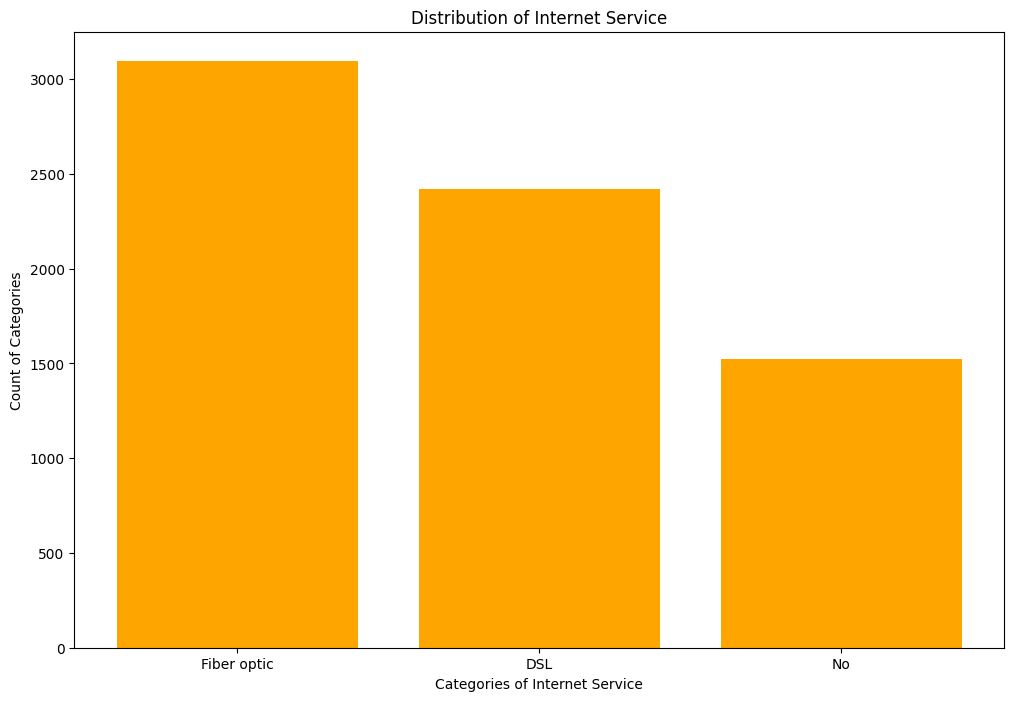

In [51]:
plt.figure(figsize=(12,8))
internet_service = df['InternetService'].value_counts()
plt.bar(internet_service.index, internet_service.values, color='orange')
plt.xlabel('Categories of Internet Service')
plt.ylabel('Count of Categories')
plt.title('Distribution of Internet Service')
plt.show()

Build a histogram for the ‘tenure’ column:

 a. Set the number of bins to be 30

 b. Set the color of the bins to be ‘green’

 c. Assign the title ‘Distribution of tenure’

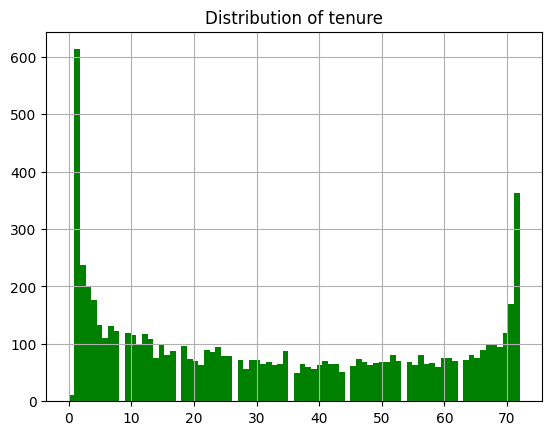

In [52]:
tenure_hist = df['tenure'].hist(bins=80, color='green')
tenure_hist.set_title('Distribution of tenure')
plt.show()

Build a scatter-plot between ‘MonthlyCharges’ and ‘tenure’. Map
 ‘MonthlyCharges’ to the y-axis and ‘tenure’ to the ‘x-axis’:

 a. Assign the points a color of ‘brown’

 b. Set the x-axis label to ‘Tenure of customer’

 c. Set the y-axis label to ‘Monthly Charges of customer’

 d. Set the title to ‘Tenure vs Monthly Charges’

 e. Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the
 y-axis & ‘Contract’ on the x-axis.

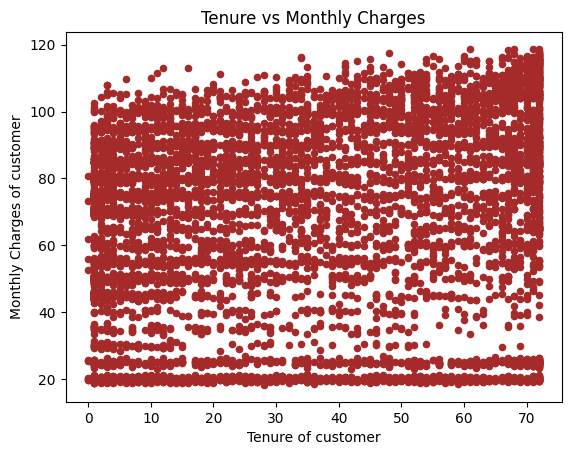

In [53]:
scatter_plot = df.plot(kind='scatter', x='tenure', y='MonthlyCharges', color='brown')
scatter_plot.set_xlabel('Tenure of customer')
scatter_plot.set_ylabel('Monthly Charges of customer')
scatter_plot.set_title('Tenure vs Monthly Charges')
plt.show()

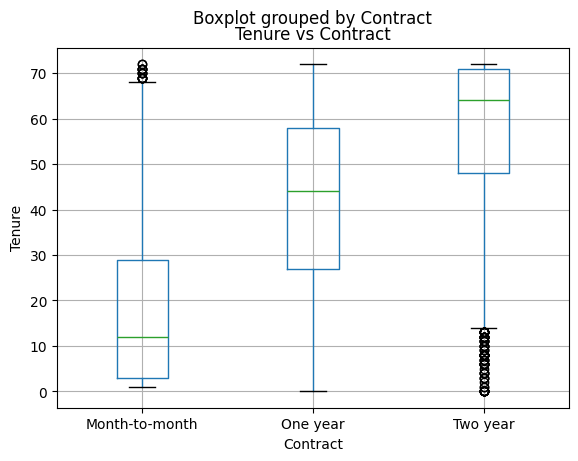

In [54]:
box_plot = df.boxplot(column='tenure', by='Contract')
plt.xlabel('Contract')
plt.ylabel('Tenure')
plt.title('Tenure vs Contract')
plt.show()

# **3. Linear Regression:**

● Build a simple linear model where dependent variable is ‘MonthlyCharges’
 and independent variable is ‘tenure’:

 a. Divide the dataset into train and test sets in 70:30 ratio.

 b. Build the model on train set and predict the values on test set

 c. After predicting the values, find the root mean square error

 d. Find out the error in prediction & store the result in ‘error’




In [55]:
# Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’:
X = df[['tenure']]
y = df['MonthlyCharges']
# Divide the dataset into train and test sets in 70:30 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
# Build the model on train set and predict the values on test set
le=LinearRegression()
le.fit(X_train, y_train)

LinearRegression()

In [57]:
# After predicting the values, find the root mean square error
linear_prediction = le.predict(X_test)
root_mean_squared_error=np.sqrt(mean_squared_error(y_test, linear_prediction))
print(root_mean_squared_error)

29.07936015646814


In [58]:
# Find out the error in prediction & store the result in ‘error
error= pd.DataFrame({'Actual': y_test, 'Predicted': linear_prediction, 'Error':y_test - linear_prediction})
print(error)


      Actual  Predicted      Error
185    24.80  55.106590 -30.306590
2715   25.25  67.435209 -42.185209
3825   19.35  70.825579 -51.475579
1807   76.35  55.106590  21.243410
132    50.55  75.448812 -24.898812
...      ...        ...        ...
5522   70.15  55.106590  15.043410
6377   44.65  55.106590 -10.456590
5500   60.50  73.291303 -12.791303
2392   90.70  60.962684  29.737316
6705   51.10  61.579115 -10.479115

[2113 rows x 3 columns]


# **4. Logistic Regression:**

 Build a simple logistic regression model where dependent variable is
 ‘Churn’ and independent variable is ‘MonthlyCharges’:

 a. Divide the dataset in 65:35 ratio

 b. Build the model on train set and predict the values on test set

 c. Build the confusion matrix and get the accuracy score

 d. Build a multiple logistic regression model where dependent variable
 is
 ‘Churn’ and independent variables are ‘tenure’ and
 ‘MonthlyCharges’

 e. Divide the dataset in 80:20 ratio

 f. Build the model on train set and predict the values on test set

 g. Build the confusion matrix and get the accuracy score

In [59]:
# Build a simple logistic regression model where dependent variable is ‘Churn’ and independent variable is ‘MonthlyCharges’:
X = df[['MonthlyCharges']]
y = df['Churn']
# Divide the dataset in 65:35 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [60]:
# Build the model on train set and predict the values on test set
lr = LogisticRegression()
lr.fit(X_train, y_train)
logistic_prediction = lr.predict(X_test)

 Accuracy Score OF our Model is: 0.7287104622871047


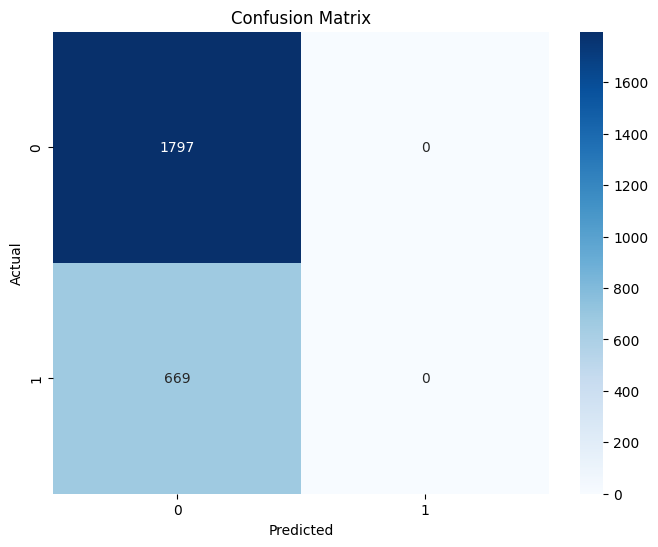

In [65]:
# Build the confusion matrix and get the accuracy score
acc_score=accuracy_score(y_test, logistic_prediction)
print(' Accuracy Score OF our Model is:', acc_score)
cm=confusion_matrix(y_test, logistic_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [66]:
# Build a multiple logistic regression model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

In [67]:
# Divide the dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Build the model on train set and predict the values on test set
lr.fit(X_train, y_train)
logistic_prediction2 = lr.predict(X_test)

 Accuracy Score OF our Model is: 0.7977288857345636


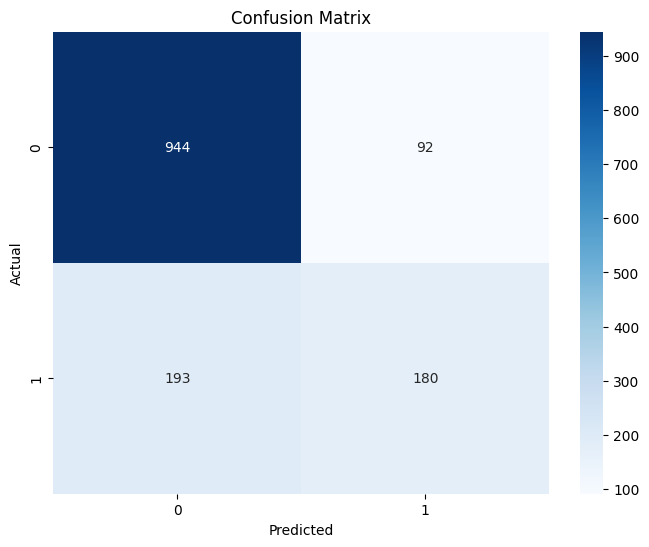

In [70]:
# Build the confusion matrix and get the accuracy score
acc_score2=accuracy_score(y_test, logistic_prediction2)
print(' Accuracy Score OF our Model is:', acc_score2)
cm=confusion_matrix(y_test, logistic_prediction2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **5. Decision Tree:**

Build a decision tree model where dependent variable is ‘Churn’ and
 independent variable is ‘tenure’:

 a. Divide the dataset in 80:20 ratio

 b. Build the model on train set and predict the values on test set

 c. Build the confusion matrix and calculate the accuracy

In [71]:
# Build a decision tree model where dependent variable is ‘Churn’ and independent variable is ‘tenure’:
X = df[['tenure']]
y = df['Churn']

In [72]:
# Divide the dataset in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Build the model on train set and predict the values on test set
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)

 Accuracy Score OF our Model is: 0.7572746628814763


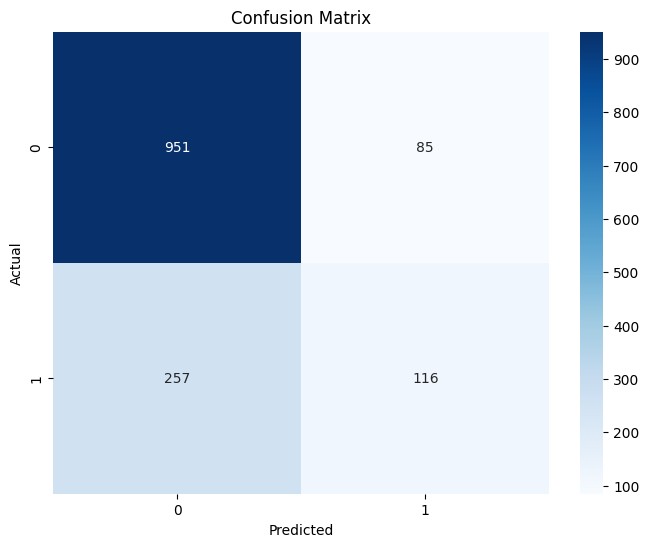

In [74]:
# Build the confusion matrix and calculate the accuracy
dt_acc_score=accuracy_score(y_test, dt_prediction)
print(' Accuracy Score OF our Model is:', dt_acc_score)
cm=confusion_matrix(y_test, dt_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **6. Random Forest:**

Build a Random Forest model where dependent variable is ‘Churn’ and
 independent variables are ‘tenure’ and ‘MonthlyCharges’:

 a. Divide the dataset in 70:30 ratio

 b. Build the model on train set and predict the values on test set

 c. Build the confusion matrix and calculate the accuracy

In [75]:
# Build a Random Forest model where dependent variable is ‘Churn’ and independent variables are ‘tenure’ and ‘MonthlyCharges’
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']

In [76]:
# Divide the dataset in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Build the model on train set and predict the values on test set
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)

 Accuracy Score OF our Model is: 0.7576904874585897


Text(0.5, 1.0, 'Confusion Matrix')

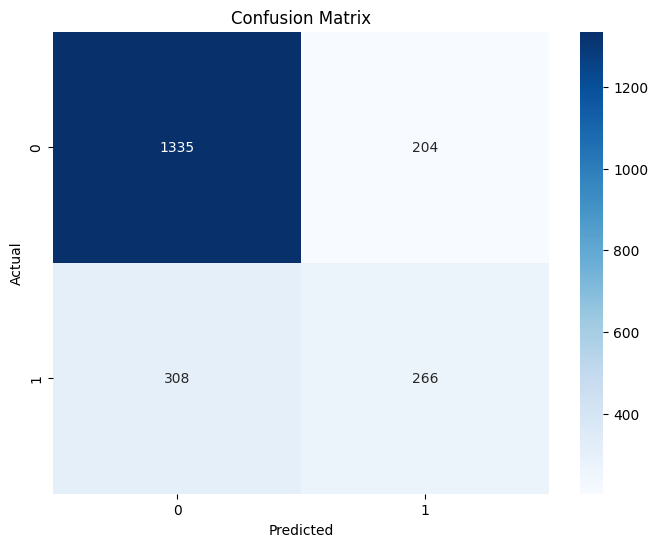

In [78]:
#  Build the confusion matrix and calculate the accuracy
rf_acc_score=accuracy_score(y_test, rf_prediction)
print(' Accuracy Score OF our Model is:', rf_acc_score)
cm= confusion_matrix(y_test, rf_prediction)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')